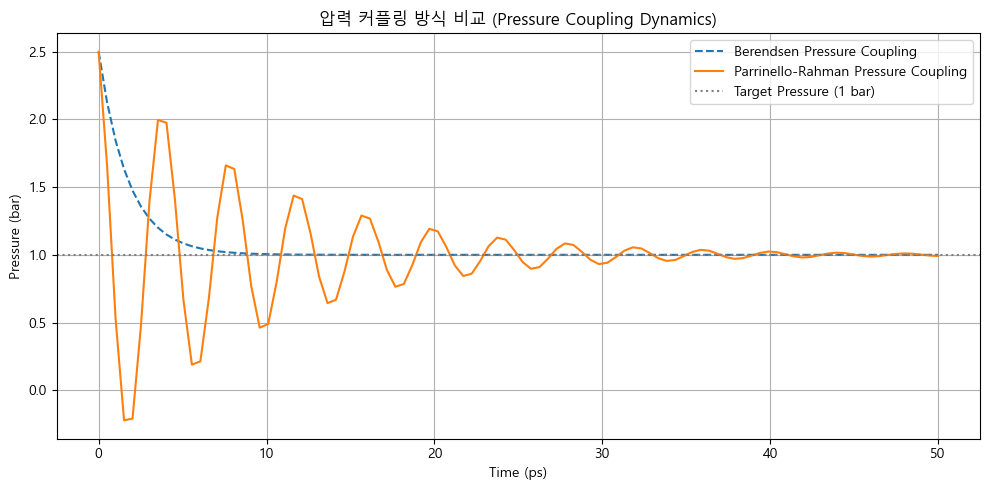

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏùò Í≤ΩÏö∞
# plt.rcParams['font.family'] = 'AppleGothic'  # macOSÏùò Í≤ΩÏö∞
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux ÎòêÎäî Í∏∞ÌÉÄ ÏãúÏä§ÌÖú

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ§Ï†ï
dt = 0.5  # ÏãúÍ∞Ñ Í∞ÑÍ≤© (ps)
n_steps = 100
time = np.linspace(0, dt * n_steps, n_steps)

# Ï¥àÍ∏∞Í∞í
P_target = 1.0  # Î™©Ìëú ÏïïÎ†• (bar)
P0 = 2.5        # Ï¥àÍ∏∞ ÏïïÎ†• (bar)

# ==============================
# Berendsen Î∞©Ïãù Î™®Îç∏
# ==============================
def berendsen_pressure(P0, tau_p, time, P_target):
    P = np.zeros_like(time)
    P[0] = P0
    for i in range(1, len(time)):
        dP = (P_target - P[i-1]) / tau_p
        P[i] = P[i-1] + dP * dt
    return P

# ==============================
# Parrinello-Rahman Î∞©Ïãù Î™®Îç∏ (2Ï∞® ÎØ∏Î∂Ñ Î∞©Ï†ïÏãù)
# ==============================
def parrinello_rahman_pressure(P0, gamma, omega, time, P_target):
    P = np.zeros_like(time)
    V = np.zeros_like(time)  # ÏïïÎ†• Î≥ÄÌôîÏú®
    P[0] = P0
    V[0] = 0.0
    for i in range(1, len(time)):
        acc = -omega**2 * (P[i-1] - P_target) - 2 * gamma * V[i-1]
        V[i] = V[i-1] + acc * dt
        P[i] = P[i-1] + V[i] * dt
    return P

# ==============================
# ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïã§Ìñâ
# ==============================

# Berendsen: tau_p = 2.0 ps
P_ber = berendsen_pressure(P0=P0, tau_p=2.0, time=time, P_target=P_target)

# Parrinello-Rahman: omega = 1.5 ps^-1, gamma = 0.1
P_pr = parrinello_rahman_pressure(P0=P0, gamma=0.1, omega=1.5, time=time, P_target=P_target)

# ==============================
# ÏãúÍ∞ÅÌôî
# ==============================

plt.figure(figsize=(10, 5))
plt.plot(time, P_ber, label='Berendsen Pressure Coupling', linestyle='--')
plt.plot(time, P_pr, label='Parrinello-Rahman Pressure Coupling', linestyle='-')
plt.axhline(P_target, color='gray', linestyle=':', label='Target Pressure (1 bar)')
plt.title("ÏïïÎ†• Ïª§ÌîåÎßÅ Î∞©Ïãù ÎπÑÍµê (Pressure Coupling Dynamics)")
plt.xlabel("Time (ps)")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[-169805000.0, -158601000.0, -147397000.0, -136194000.0, -124990000.0, -113786000.0, -102582000.0, -91378300.0, -80174500.0, -68970600.0, -57766800.0, -46563000.0, -35359100.0, -24155300.0, -12951500.0, -1747620.0, 9456210.0, 20660000.0, 31863900.0, 43067700.0, 54271500.0, 65475400.0, 76679200.0, 87883000.0, 99086900.0, 110291000.0, 121495000.0, 132698000.0, 143902000.0, 155106000.0, 166310000.0, 177514000.0, 188718000.0]
{'A': (0.0, 0.0, 0.0), 'B': (0.043137254901960784, 0.043137254901960784, 0.043137254901960784), 'C': (0.08235294117647059, 0.08235294117647059, 0.08235294117647059), 'D': (0.12549019607843137, 0.12549019607843137, 0.12549019607843137), 'E': (0.16862745098039217, 0.16862745098039217, 0.16862745098039217), 'F': (0.20784313725490197, 0.20784313725490197, 0.20784313725490197), 'G': (0.25098039215686274, 0.25098039215686274, 0.25098039215686274), 'H': (0.2901960784313726, 0.2901960784313726, 0.2901960784313726), 'I': (0.3333333333333333, 0.3333333333333333, 0.3333333333333

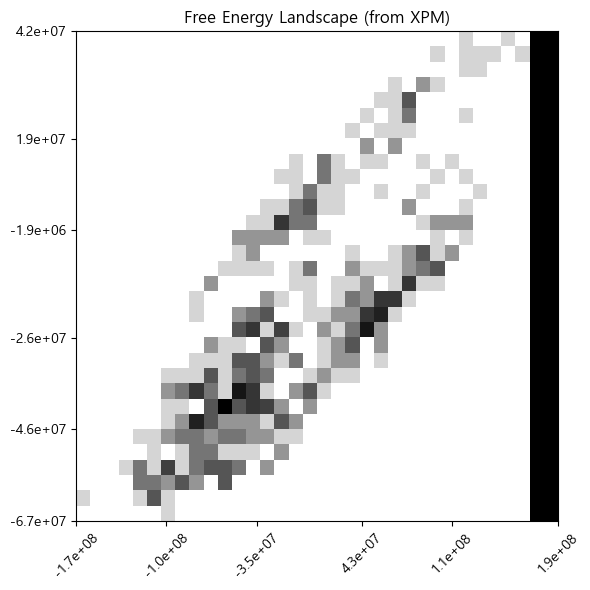

In [ ]:
import matplotlib
matplotlib.use('Agg')  # GUI Ï∞Ω ÏóÜÏù¥ PNGÎ°ú Ï†ÄÏû•Îßå Í∞ÄÎä•
with open("fel.xpm", "r") as f:
    string = f.read()
lis = string.strip().split("\n")
las = [ i for i, x in enumerate(lis) if "/* x-axis:" in x  ]
data_start = [ i for i, x in enumerate(lis) if "/* y-axis:" in x  ][0] + 1
colors = lis[lis.index("static char *gromacs_xpm[] = {") +2: las[0]]
data = lis[data_start:]
colors

xticks =[ float(x) for x in  lis[ [ i for i , x in enumerate(lis) if "x-axis" in x][0]].split(" ")[3:-1]]
yticks =[ float(x) for x in  lis[ [ i for i , x in enumerate(lis) if "y-axis" in x][0]].split(" ")[3:-1]]
print(xticks)
# Hex ‚Üí RGB Ìï®Ïàò
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

# Step 1: Î¨∏Ïûê ‚Üí RGB Îß§Ìïë
color_map = {}
for line in colors:
    char, hex_color = line[1] , line.split("#")[1].split('"')[0].strip()
    color_map[char.strip()] = hex_to_rgb(hex_color)
print(color_map)
# Step 2: RGB Î∞∞Ïó¥ ÎßåÎì§Í∏∞
height = len(data)
width = len(data[0].strip('"'))
rgb_array = np.zeros((height, width, 3))  # 3Ï±ÑÎÑê RGB
for i, line in enumerate(data):
    chars = line.strip().strip('"')
    for j, char in enumerate(chars):
        rgb_array[i, j] = color_map.get(char, (0, 0, 0))  # ÏóÜÏúºÎ©¥ Í≤ÄÏ†ï
plt.figure(figsize=(6, 6))
plt.imshow(rgb_array, origin='lower', extent=[xticks[0], xticks[-1], yticks[0], yticks[-1]], aspect='auto')
plt.title("Free Energy Landscape (from XPM)")
x_tick_idx = np.linspace(0, len(xticks) - 1, 6, dtype=int)
y_tick_idx = np.linspace(0, len(yticks) - 1, 6, dtype=int)

plt.xticks([xticks[i] for i in x_tick_idx],
           [f"{xticks[i]:.1e}" for i in x_tick_idx], rotation=45)
plt.yticks([yticks[i] for i in y_tick_idx],
           [f"{yticks[i]:.1e}" for i in y_tick_idx])
plt.tight_layout()
plt.savefig("fel_xpm.png")

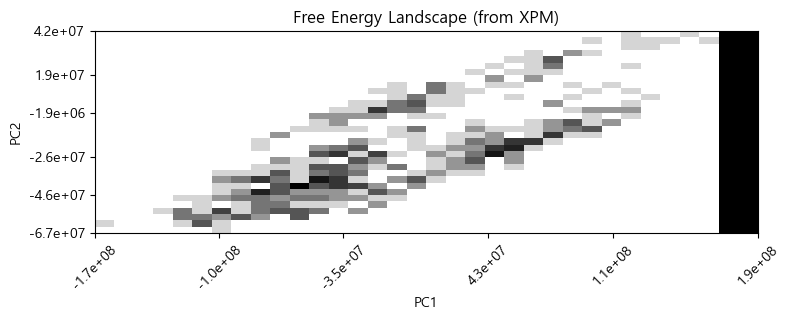

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import re

# ÏõêÎ≥∏ Î¨∏ÏûêÏó¥ ÌååÏã±
lis = string.strip().split("\n")
las = [i for i, x in enumerate(lis) if "/* x-axis:" in x]
data_start = [i for i, x in enumerate(lis) if "/* y-axis:" in x][0] + 1

colors = lis[lis.index("static char *gromacs_xpm[] = {") + 2 : las[0]]
data = lis[data_start:]

# üéØ x/y Ï∂ï Îç∞Ïù¥ÌÑ∞ ÌååÏã±
x_axis_str = lis[las[0]]
y_axis_str = lis[las[0] + 1]

x_axis = list(map(float, re.findall(r"[-+]?\d*\.\d+e[+-]?\d+|\d+", x_axis_str)))
y_axis = list(map(float, re.findall(r"[-+]?\d*\.\d+e[+-]?\d+|\d+", y_axis_str)))

# Hex ‚Üí RGB Î≥ÄÌôò Ìï®Ïàò
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

# Step 1: Î¨∏Ïûê ‚Üí RGB Îß§Ìïë
color_map = {}
for line in colors:
    char = line[1]
    hex_color = line.split("#")[1].split('"')[0].strip()
    color_map[char.strip()] = hex_to_rgb(hex_color)

# Step 2: RGB Î∞∞Ïó¥ ÎßåÎì§Í∏∞
height = len(data)
width = len(data[0].strip('"'))
rgb_array = np.zeros((height, width, 3))  # 3Ï±ÑÎÑê RGB

for i, line in enumerate(data):
    chars = line.strip().strip('"')
    for j, char in enumerate(chars):
        rgb_array[i, j] = color_map.get(char, (0, 0, 0))
# Step 3: ÏãúÍ∞ÅÌôî (with ticks)
fig, ax = plt.subplots(figsize=(8, 8))  # Ï†ïÏÇ¨Í∞ÅÌòï canvas
im = ax.imshow(
    rgb_array,
    origin='lower',
    extent=[x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]]
)
ax.set_title("Free Energy Landscape (from XPM)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Ï∂ï ÎπÑÏú® ÎèôÏùºÌïòÍ≤å Í∞ïÏ†ú
ax.set_aspect('equal')

# Tick ÏÑ§Ï†ï
x_tick_indices = np.linspace(0, len(x_axis)-1, 6, dtype=int)
y_tick_indices = np.linspace(0, len(y_axis)-1, 6, dtype=int)
ax.set_xticks([x_axis[i] for i in x_tick_indices])
ax.set_xticklabels([f"{x_axis[i]:.1e}" for i in x_tick_indices], rotation=45)
ax.set_yticks([y_axis[i] for i in y_tick_indices])
ax.set_yticklabels([f"{y_axis[i]:.1e}" for i in y_tick_indices])

plt.tight_layout()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

string = """(Ïó¨Í∏∞ÏóêÎäî ÏúÑÏùò Í∏¥ XPM string Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)"""
lis = string.strip().split("\n")
las = [i for i, x in enumerate(lis) if "/* x-axis:" in x]
data_start = [i for i, x in enumerate(lis) if "/* y-axis:" in x][0] + 1
colors = lis[lis.index("static char *gromacs_xpm[] = {") + 2: las[0]]
data = lis[data_start:]


IndexError: list index out of range